In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import os
from matplotlib.colors import LinearSegmentedColormap
import future.utils
import json
import numpy as np
import tqdm
import json
import os
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm


In [2]:
print('matplotlib: {}'. format(mpl.__version__))

matplotlib: 3.1.0


In [3]:
mpl.rcParams['agg.path.chunksize'] = 10000000

In [4]:
finalfile = "algorithmicBiasMediaModelMetrics2.csv"

In [5]:
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])

In [6]:
results = results[results['gam'] != 0.25]
results

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.468300,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.459000,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.460300,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.469300,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.466800,0.246906,0.147068,35.460000,5.872683
5,100,1.0,0.2,1.50,1.50,0.0,1000000,0.05;0.5;0.95,4.301554,1.906391,...,57.0,0.270018,0.240303,0.27550,0.0045,0.467300,0.242939,0.151086,42.764706,7.389946
6,100,1.0,0.3,0.00,0.00,0.0,1000000,0.05;0.5;0.95,1.416930,0.424358,...,32.0,0.107041,0.197067,0.00030,0.0000,0.001000,0.000231,0.000312,25.094340,3.546266
7,100,1.0,0.3,0.50,0.50,0.0,1000000,0.05;0.5;0.95,1.904386,0.981943,...,36.5,0.134928,0.208474,0.00190,0.0007,0.383300,0.031962,0.087905,24.934426,4.482640
8,100,1.0,0.3,0.75,0.75,0.0,1000000,0.05;0.5;0.95,1.890843,1.017203,...,42.5,0.128979,0.208682,0.00240,0.0010,0.357900,0.017955,0.054582,29.018868,5.523502
9,100,1.0,0.3,1.00,1.00,0.0,1000000,0.05;0.5;0.95,1.710322,0.958429,...,59.5,0.106108,0.193368,0.00290,0.0010,0.043300,0.003752,0.004699,44.584906,8.612045


In [7]:
gams = list(results.gam.unique())
p_medias = list(results.p_media.unique())
epss = list(results.eps.unique())
mos = list(results.media_op.unique())
print(gams, p_medias, epss, mos)

[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.5;0.95', '0.05;0.95', '0.0', '0.5']


In [8]:
balanced = results[results['media_op'] == '0.05;0.5;0.95']
print(len(balanced))
gams = list(balanced.gam.unique())
p_medias = list(balanced.p_media.unique())
epss = list(balanced.eps.unique())
mos = list(balanced.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.5;0.95']


In [9]:
polarised = results[results['media_op'] == '0.05;0.95']
print(len(polarised))
gams = list(polarised.gam.unique())
p_medias = list(polarised.p_media.unique())
epss = list(polarised.eps.unique())
mos = list(polarised.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.95']


In [10]:
extremist = results[results['media_op'] == '0.0']
print(len(extremist))
gams = list(extremist.gam.unique())
p_medias = list(extremist.p_media.unique())
epss = list(extremist.eps.unique())
mos = list(extremist.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.0']


In [11]:
moderate = results[results['media_op'] == '0.5']
print(len(moderate))
gams = list(moderate.gam.unique())
p_medias = list(moderate.p_media.unique())
epss = list(moderate.eps.unique())
mos = list(moderate.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.5']


In [12]:
deffuant = results[results['gam']==0.0]

In [13]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

heatmap_hex_list = ['#357db0', '#ce2626']
heatmap_cmap=get_continuous_cmap(heatmap_hex_list)

spaghetti_hex_list = ['#357db0', '#18A558', '#ce2626']
spaghetti_cmap=get_continuous_cmap(spaghetti_hex_list)



In [14]:
def from_res_to_iterations(name, nr):
    res = open("{}.csv".format(name))
    iterations = []
    it = 0
    for line in res.readlines():
        iterations.append(dict())
        iterations[it]['iteration'] = it
        iterations[it]['status'] = dict()

        opinions = line.strip().split(',')

        for i in range(len(opinions)):
            iterations[it]['status'][i] = float(opinions[i])
            iterations[it]['node_count'] = {0: 0},
            iterations[it]['status_delta'] = {0: 0}

        it += 1
        
    return iterations

def evolution(iterations, hex_list, fig, ax):

    spaghetti_hex_list = ['#357db0', '#18A558', '#ce2626']


    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = spaghetti_hex_list[0]
                elif 0.33 <= v <= 0.66:
                    node2col[n] = spaghetti_hex_list[1]
                else:
                    node2col[n] = spaghetti_hex_list[2]

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1.5, alpha=0.5, color=node2col[k])
    
    # ax.set_ylim(-0.1, 1.1)
    # ax.set_xlim(0, 1000)
    # ax.tick_params(axis='both', which='major', labelsize=4, pad=0) 
    # ax.set_xlabel("o", fontsize=5)
    # ax.set_ylabel("t", fontsize=5)               
    # plt.grid(axis = 'both', which='both')
    plt.tight_layout()

In [15]:
settings = ['extremist', 'moderate', 'polarised', 'balanced']
for setting in settings:
    if not os.path.exists(f"scirep/"):
        os.mkdir("scirep/")
    if not os.path.exists(f"scirep/plots/"):
        os.mkdir("scirep/plots/")
    if not os.path.exists(f"scirep/plots/{setting}"):
        os.mkdir(f"scirep/plots/{setting}/")

In [16]:
# n = 100
# graph = nx.complete_graph(n)
# max_it = 1000000
# i = 0
# settings = ['moderate']
# for mo in [[0.5]]:
#     for pm in [0.0, 0.1, 0.5]:
#         for e in [0.2, 0.3, 0.4, 0.5]:
#             for g in [0.0, 0.5, 1.0, 1.5]:
#                 if not os.path.exists(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png"):
#                     print("doing")
#                     print((f"scirep/plots/{settings[i]}/{settings[i]}_spaghetti_pm{pm}_e{e}_g{g}.png"))
#                     sns.set_style("white")
#                     model = op.AlgorithmicBiasMediaModel(graph)
#                     config = mc.Configuration()
#                     config.add_model_parameter("epsilon", e)
#                     config.add_model_parameter("gamma", g)
#                     config.add_model_parameter("gamma_media", g)
#                     config.add_model_parameter("k", len(mo))
#                     config.add_model_parameter("p", pm)
#                     model.set_initial_status(config)
#                     model.set_media_opinions(mo)
#                     # # Simulation execution
#                     iterations = model.steady_state(max_iterations=max_it, nsteady=1000, sensibility=0.00001, node_status=True, progress_bar=True, drop_evolution=False)
#                     fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
#                     evolution(iterations, spaghetti_hex_list, fig=fig, ax=ax)
#                     #plt.savefig(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png", bbox_inches="tight")
#                     plt.show()
#                     plt.close()
#                 else:
#                     continue
#                     print(f"esiste già")
# #                     print(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png")
#     i+=1

In [17]:
averages = [a for a in list(results.columns) if a.startswith('avg') or a.startswith('iqm')]
medians = [m for m in  list(results.columns) if m.startswith('med')]
Q1s = [q for q in  list(results.columns) if q.startswith('Q1')]
Q3s = [q for q in  list(results.columns) if q.startswith('Q3')]
titles = ['pairwise distance', '# clusters', '# clusters', '# iterations', 'average opinion', 'std opinions', 'median opinion', '% extremist (0.0)', '% moderates (0.5)', '% extremists (0.05)', '% extremists (0.95)', 'normalized entropy', 'normalized entropy']
# stdmeasures = ['std_'+measure for measure in measures]
# stdmeasures

# Heatmaps

In [18]:
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.pad']='-2'
plt.rcParams['ytick.major.pad']='-1'
width = 3
heigth = 3

In [20]:
def heatmap_per_main(df, setting):
    for measure in ['avg_ncluster_0.01', 'avg_05_perc']:
        if not os.path.exists(f'plots/main/{setting}/{measure}'):
            os.mkdir(f'plots/main/{setting}/{measure}/')
        
    for measure in ['avg_05_perc']:
        for eps in sorted(df.eps.unique()):
            cbar=False
            fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
            x = "p_media"
            y = "gam"
            data = df[df["eps"]==eps]
            d = data.pivot(x, y, measure)
            if max(df[measure]) > 1000:
                a=sns.heatmap(d, cbar=cbar, cbar_kws = dict(use_gridspec=False, location="right"), fmt=".0g", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 8}, linewidth=0.1, linecolor='w')
            elif max(df[measure]) > 100:
                a=sns.heatmap(d, cbar=cbar, cbar_kws = dict(use_gridspec=False, location="right", format="%.0f"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            elif max(df[measure]) > 10:
                a=sns.heatmap(d, cbar=cbar, cbar_kws = dict(use_gridspec=False, location="right", format="%.1f"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            else:
                a=sns.heatmap(d, cbar=cbar, cbar_kws = dict(use_gridspec=False, location="right", format="%.2f"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            ax.set_xlabel(r'$\gamma$', fontsize = 20)
            ax.set_ylabel(r'$p_m$', fontsize = 20)
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
            ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
            plt.savefig(f"plots/main/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap_main.png", bbox_inches="tight")
            plt.close()
        fig1, ax1 = plt.subplots(figsize=(0.2, 3), dpi=300)
        cbar = fig.colorbar(ax.collections[0], cax=ax1, orientation='vertical')
        cbar.outline.set_visible(False)
        plt.savefig(f"plots/main/{setting}/{measure}/{setting}_{measure}_e{eps}_colorbar_main.png", bbox_inches="tight")
        plt.close()
    print('done')  

In [21]:
def heatmap_per_supplementary(df, setting):
    for measure in averages:
        if not os.path.exists(f'plots/supplementary/{setting}/{measure}'):
            os.mkdir(f'plots/supplementary/{setting}/{measure}/') 
    for measure in medians:
        if not os.path.exists(f'plots/supplementary/{setting}/{measure}'):
            os.mkdir(f'plots/supplementary/{setting}/{measure}')
    for measure in averages:
        for eps in sorted(df.eps.unique()):
            fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
            x = "p_media"
            y = "gam"
            data = df[df["eps"]==eps]
            d = data.pivot(x, y, measure)
            if max(df[measure]) > 1000:
                a=sns.heatmap(d, cbar=True, cbar_kws = dict(use_gridspec=False, location="right"), fmt=".0g", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 8}, linewidth=0.1, linecolor='w')
            elif max(df[measure]) > 100:
                a=sns.heatmap(d, cbar=True, cbar_kws = dict(use_gridspec=False, location="right", format="%.0f"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            elif max(df[measure]) > 10:
                a=sns.heatmap(d, cbar=True, cbar_kws = dict(use_gridspec=False, location="right", format="%.1f"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            else:
                a=sns.heatmap(d, cbar=True, cbar_kws = dict(use_gridspec=False, location="right", format="%.2f"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
            ax.set_xlabel(r'$\gamma$', fontsize = 20)
            ax.set_ylabel(r'$p_m$', fontsize = 20)
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
            ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
            plt.savefig(f"plots/supplementary/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
            plt.close()
    print('done')  


In [22]:
heatmap_per_main(moderate, 'moderate')
# heatmap_per_main(extremist, 'extremist')
# heatmap_per_main(polarised, 'polarised')
# heatmap_per_main(balanced, 'balanced')

done


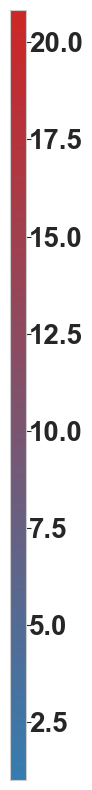

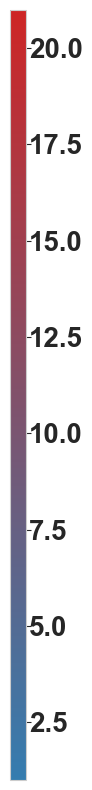

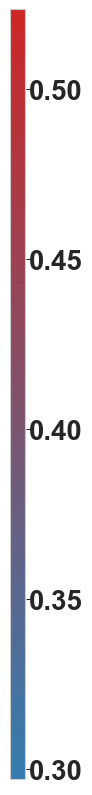

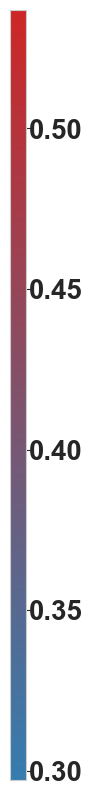

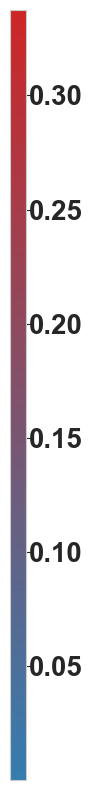

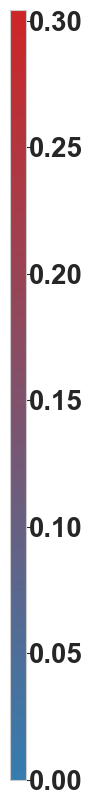

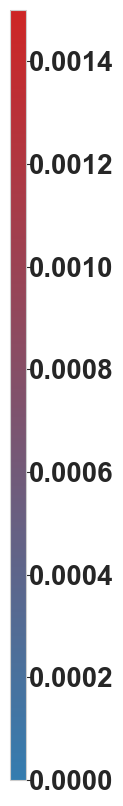

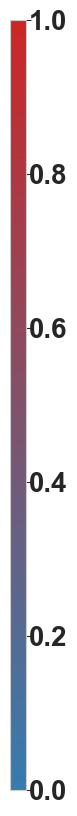

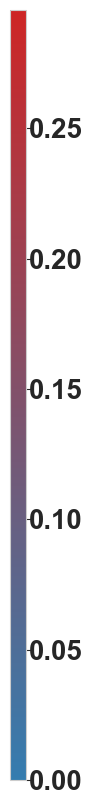

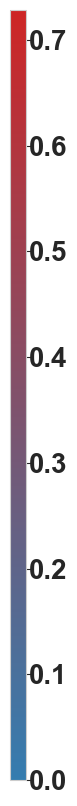

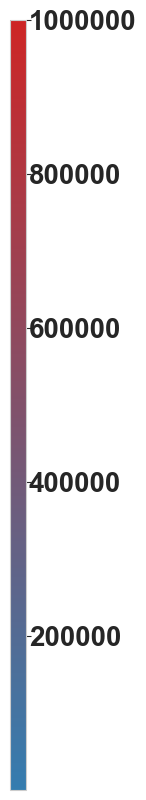

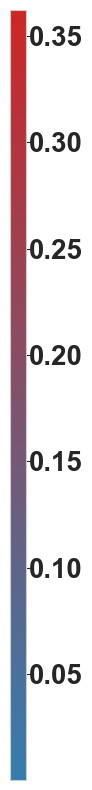

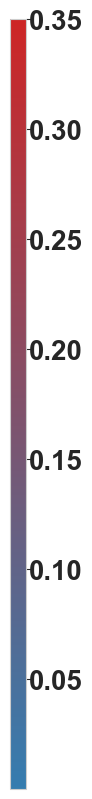

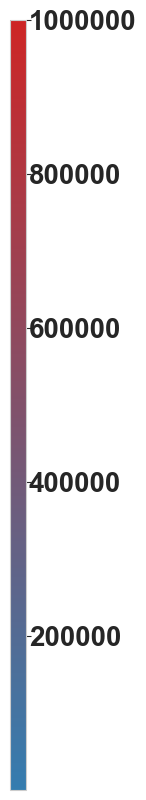

done


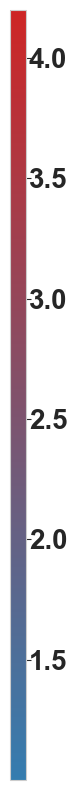

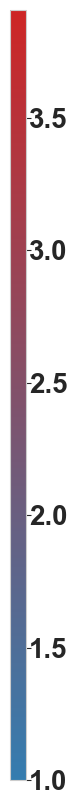

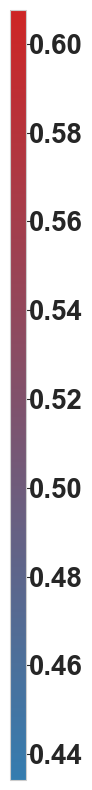

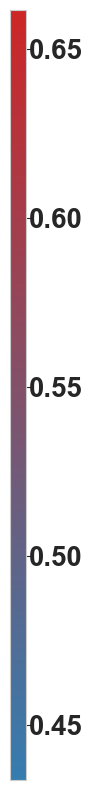

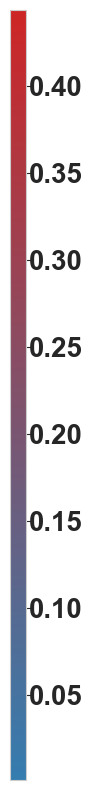

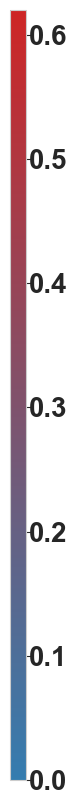

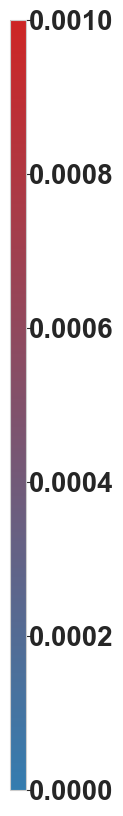

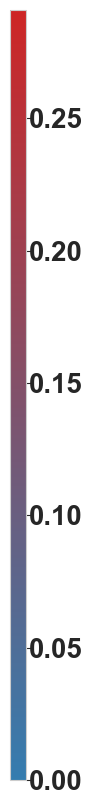

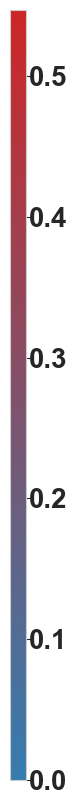

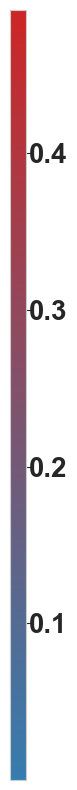

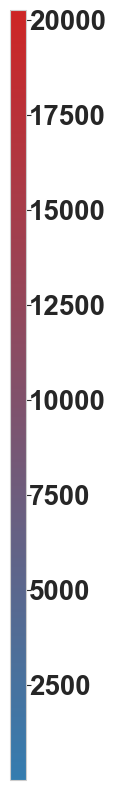

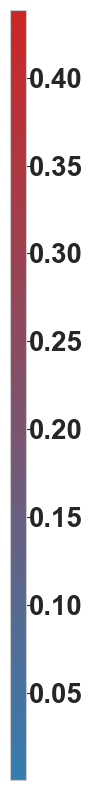

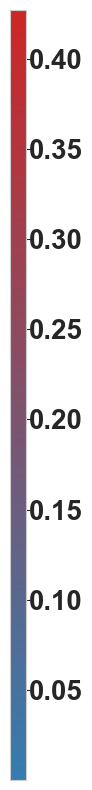

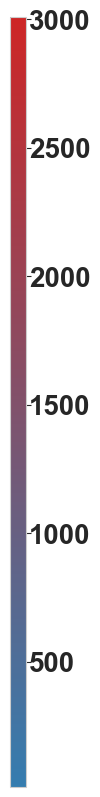

done


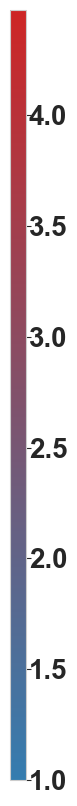

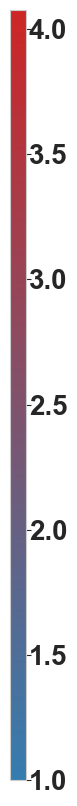

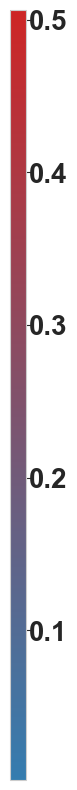

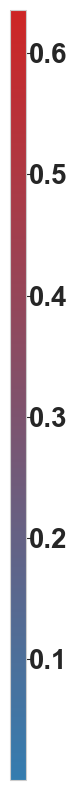

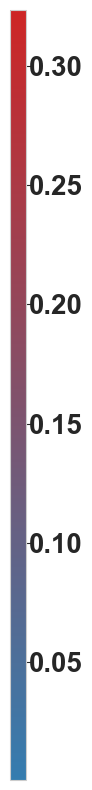

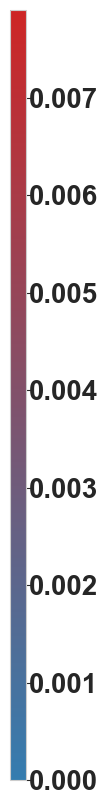

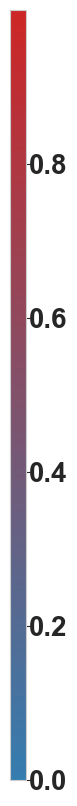

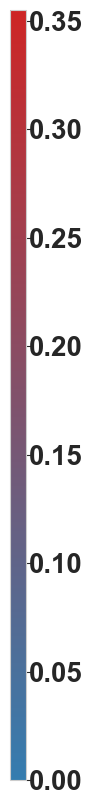

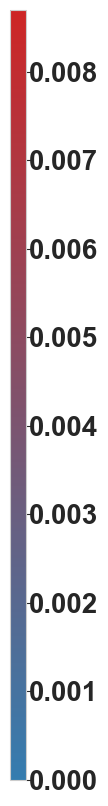

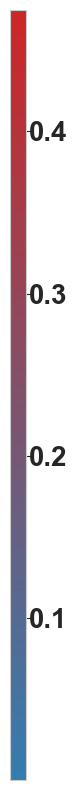

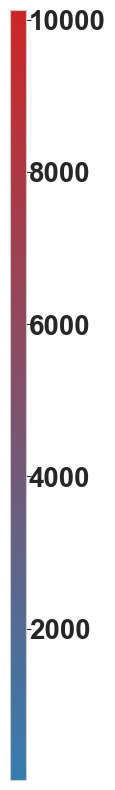

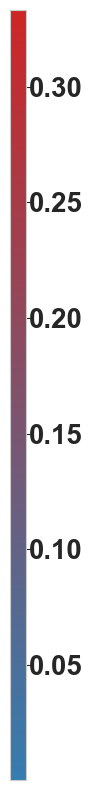

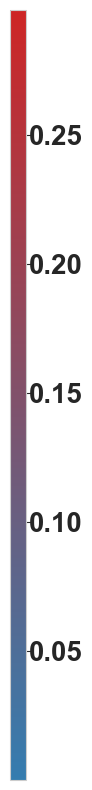

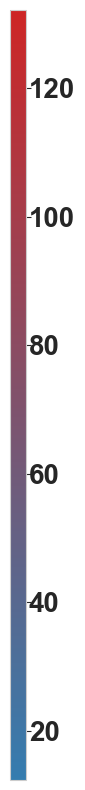

done


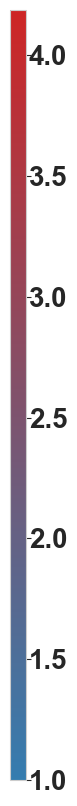

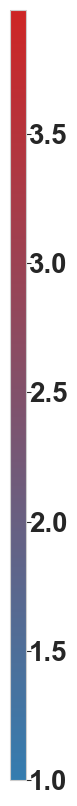

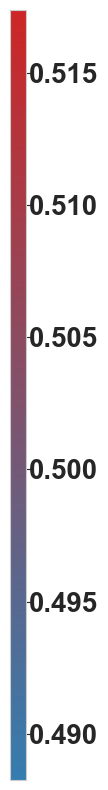

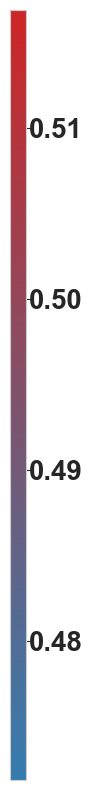

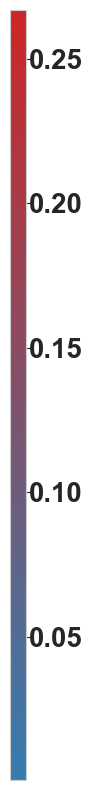

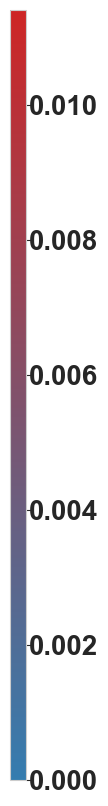

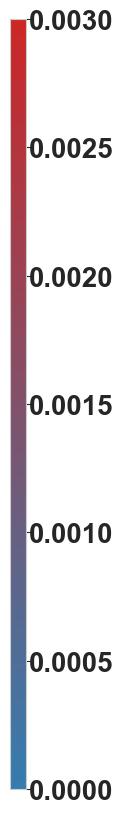

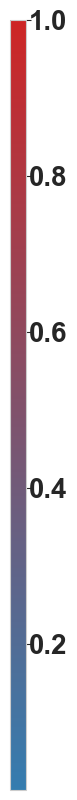

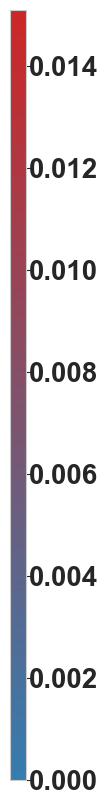

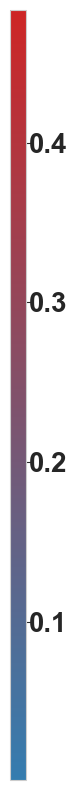

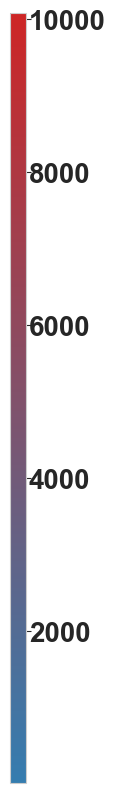

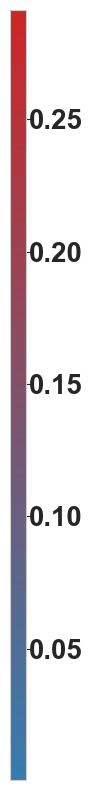

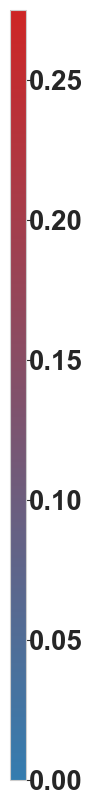

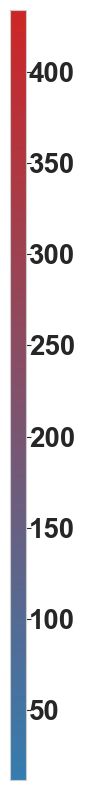

done


In [52]:
# for setting in settings:
#     if not os.path.exists(f'scirep/plots/{setting}/'):
#         os.mkdir(f'scirep/plots/{setting}')
          
# setting = 'balanced'
# df = balanced


# #polarised setting
# setting = 'polarised'
# df = polarised

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
            
# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 1000:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2g", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 8}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()

#     fig1, ax1 = plt.subplots(figsize=(0.2, 10))
#     cbar = fig.colorbar(ax.collections[0], cax=ax1, orientation='vertical')
#     plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_colorbar.png", bbox_inches="tight")
#     plt.show()
#     plt.close()
# print('done')  

# setting = 'extremist'
# df = extremist

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
            
# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 1000:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2g", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 8}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()

#     fig1, ax1 = plt.subplots(figsize=(0.2, 10))
#     cbar = fig.colorbar(ax.collections[0], cax=ax1, orientation='vertical')
#     plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_colorbar.png", bbox_inches="tight")
#     plt.show()
#     plt.close()
# print('done')      

# setting = 'moderate'
# df = moderate

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')

# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 1000:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2g", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 8}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': 10}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()

#     fig1, ax1 = plt.subplots(figsize=(0.2, 10))
#     cbar = fig.colorbar(ax.collections[0], cax=ax1, orientation='vertical')
#     plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_colorbar.png", bbox_inches="tight")
#     plt.show()
#     plt.close()
# print('done')  


In [ ]:
# ### problema da risolvere: error bar asimmetriche
# ### allora invece di fare media e sd potrei fare dei mini boxplottini però devo andà a riacchiappà i file originali 

# from matplotlib.ticker import FormatStrFormatter

# markers = ['s', 'o', 'v', '^', '<', '>']
# colors = ['tab:red', 'tab:blue', 'tab:green', 'yellow', 'purple', 'orange']
# sns.set(font_scale=2.5)
# sns.set_style("whitegrid")
# plt.rcParams['xtick.major.size'] = 10
# plt.rcParams['xtick.major.width'] = 4
# plt.rcParams['ytick.major.size'] = 10
# plt.rcParams['ytick.major.width'] = 4
# plt.rcParams['xtick.bottom'] = True
# plt.rcParams['ytick.left'] = True
# plt.rcParams['font.family']='serif'
# plt.rcParams['font.size'] = 16

# m = 0
# for measure in medians:
#     i=0
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=1, dpi=600)
#         x = "gam"
#         y = "p_media"
#         data = df[df["eps"]==eps]
#         j = 0
#         for pm in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
#             data1 = data[data['p_media'] == pm]
#             ax.errorbar(x = data1['gam'], y=data1[measure])
#             j+=1
#         j=0
#         for pm in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
#             data1 = data[data['p_media'] == pm]
# #             ax.scatter(x = data1['gam'], y=data1[measure], marker = [], c=colors[j], label=pm)
#             j +=1 
#         ax.set_xlabel(r'$\gamma$', fontsize=30, labelpad=10)
# #         ax.set_ylabel(f'{titles[m]}', fontsize=30, labelpad=10)
#         ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
#         ax.tick_params(axis='x', which='both', labelrotation=45)
#         ax.tick_params(axis='y', which='both', pad=5)
#         ax.legend(loc='best', title=r'$p_m$', prop={'size': 10})
# #         ax.set_ylim(bottom=min(df[measure])-max(df[errs[m]])-0.05, top = max(df[measure])+max(df[errs[m]])+0.05)
#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# #     #plt.savefig(f"plots/{setting}/{measure}/{setting}_{measure}_e{eps}_2D.png", bbox_inches="tight")
#     #plt.show()
#     plt.close()
#     m+=1

In [ ]:
from scipy import stats

def nclusters(data, threshold):
    data = [float(el) for el in data]
    data = sorted(data)
    start = data[0]
    max_val = start + threshold
    c = (start, max_val)
    cluster = dict()
    for i in data:
        if i <= max_val:
            if c in cluster.keys():
                cluster[c] += 1
            else:
                cluster[c] = 1
        else:
            max_val = i + threshold
            c = (i, max_val)
            cluster[c] = 1
    #ora ho il dizionario con i cluster di una run
    C_num = len(data)**2
    C_den = 0
    for k in cluster.keys():
        C_den += cluster[k]*cluster[k]
    C = C_num / C_den
    return C

def pwdist(opinions):
    pwdarray = np.zeros(shape=(100, 100))
    for i in range(100):
        o_i = opinions[i]
        for j in range(100):
            if j != i:
                o_j = opinions[j]
                d = abs(o_i-o_j)
                pwdarray[i, j] = d
    return pwdarray

def entropy(opinions, n, nbins):
    bincounts, bin_edges = np.histogram(opinions, bins = np.linspace(0, 1, nbins))
    probabilities = bincounts/n
    entr = stats.entropy(probabilities)
    return entr

def nodeperc_withininterval(opinions, center, width):
    sortedops = sorted(opinions)
    sortedopsarr = np.array(sortedops)
    withinrange = np.where(np.logical_and(sortedopsarr>=(center-width), sortedopsarr<=(center+width)))
    withinrange = withinrange[0]
    perc = len(withinrange) / len(sortedops)
    return perc

def average_opinions(opinions):
    a = np.array(opinions)
    return np.average(a)

def std_opinions(opinions):
    a = np.array(opinions)
    return np.std(a)

def median_opinions(opinions):
    a = np.array(opinions)
    return np.median(a)




In [ ]:
max_entr_array = np.arange(0, 1, 0.01)
maxval = entropy(max_entr_array, 100, 101)

In [ ]:
from matplotlib.offsetbox import AnchoredText
markers = ['s', 'o', 'v', '^', '<', '>']
colors = ['tab:red', 'tab:blue', 'tab:green', 'yellow', 'purple', 'orange']
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.pad']='-2'
plt.rcParams['ytick.major.pad']='-5'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size'] = 16

sns.set_style("white")
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)

distr = []
for i in range(100):
    if i < 33:
        distr.append(0.8)
    elif i > 66:
        distr.append(0.2)
    else:
        distr.append(0.5)
        
nc = nclusters(distr, 0.01)
entr = entropy(distr, 100, 101)/maxval
pwd = np.mean(pwdist(distr))
std = np.std(np.array(distr))
text = f"C={round(nc,2)}\nE={round(entr,2)}\npd={round(pwd,2)}\nstd={round(std,2)}"
ax.scatter(x=[i for i in range(100)], y = sorted(distr), c= sorted(distr), cmap=spaghetti_cmap, s=5)
ax.set_xticklabels("")
ax.set_ylabel(r"$x_i$", rotation=0, labelpad=10)
ax.set_ylim(-0.05, 1.05)
# ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation = 0)
at = AnchoredText(text, prop=dict(size=10), frameon=True, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
plt.savefig("a.png", bbox_inch='tight')
plt.show()
plt.close()

In [ ]:
np.mean(pwdist)